# Modeling and Simulation in Python

Quick implementation of Lotka-Volterra (*with* explicit dt).

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    t_minus_one = t0
    for t in linrange(t0 + dt, t_end + dt, dt):
        frame.row[t] = update_func(frame.row[t_minus_one], t, system)
        t_minus_one = t
        
    return frame

In [3]:
def update_func(state, t, system):
    """Update the Lotka-Volterra model.
    
    state: State(x, y)
    t: time
    system: System object
    
    returns: State(x, y)
    """
    unpack(system)
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    x += dxdt * dt
    y += dydt * dt
    
    return State(x=x, y=y)

In [4]:
init = State(x=1, y=1)

,values
x,1
y,1


In [5]:
system = System(alpha=0.05,
                beta=0.1,
                gamma=0.1,
                delta=0.1,
                t0=0,
                t_end=200,
                dt=0.1)

,values
alpha,0.05
beta,0.10
gamma,0.10
delta,0.10
t0,0.00
t_end,200.00
dt,0.10


In [6]:
update_func(init, 0, system)

,values
x,0.995
y,1.000


In [7]:
results = run_simulation(system, update_func)
results.head()

,x,y
0.0,1,1
0.1,0.995,1
0.2,0.990025,0.99995
0.3,0.985075,0.99985
0.4,0.980151,0.999701


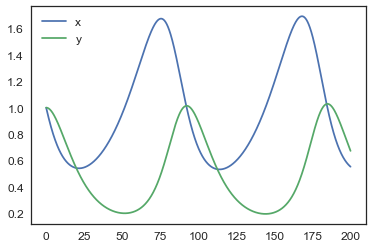

In [8]:
results.plot()